In [32]:
# import the libraries we will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
%pip install streamlit 
%pip install statsmodels 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [33]:
CP_df = pd.read_csv('CPI_PPI.csv')

In [34]:
CP_df = CP_df.rename(columns={'Data Series':'Category'})

In [35]:
CP_df[CP_df['PPI_Value']=='na']

,Category,Date,CPI_Value,PPI_Value
258,Fabrics & Related Products,2014 Apr,103.243,na
259,Fabrics & Related Products,2014 Aug,106.306,na
260,Fabrics & Related Products,2014 Dec,107.189,na
261,Fabrics & Related Products,2014 Feb,98.766,na
262,Fabrics & Related Products,2014 Jan,101.379,na
...,...,...,...,...
361,Fabrics & Related Products,2022 Mar,97.002,na
362,Fabrics & Related Products,2022 May,96.650,na
363,Fabrics & Related Products,2022 Nov,100.651,na
364,Fabrics & Related Products,2022 Oct,99.663,na


In [36]:
# Removing all 'Fabrics & Related Products' rows as they contain mostly NULL values
CP_df = CP_df[CP_df['Category'] != 'Fabrics & Related Products']

In [37]:
CP_df

,Category,Date,CPI_Value,PPI_Value
0,Bread & Cereals,2014 Apr,93.684,80.333
1,Bread & Cereals,2014 Aug,93.827,80.298
2,Bread & Cereals,2014 Dec,94.538,80.196
3,Bread & Cereals,2014 Feb,93.403,80.288
4,Bread & Cereals,2014 Jan,93.272,80.298
...,...,...,...,...
1285,Vegetables & Fruit,2024 Jul,116.710,100
1286,Vegetables & Fruit,2024 Jun,116.071,100
1287,Vegetables & Fruit,2024 Mar,114.647,100
1288,Vegetables & Fruit,2024 May,115.762,100


In [38]:
CP_df['PPI_Value'] = pd.to_numeric(CP_df['PPI_Value'], errors='coerce')
CP_df['Date'] = pd.to_datetime(CP_df['Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_21956\2899838529.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  CP_df['Date'] = pd.to_datetime(CP_df['Date'])


In [39]:
CP_df

,Category,Date,CPI_Value,PPI_Value
0,Bread & Cereals,2014-04-01,93.684,80.333
1,Bread & Cereals,2014-08-01,93.827,80.298
2,Bread & Cereals,2014-12-01,94.538,80.196
3,Bread & Cereals,2014-02-01,93.403,80.288
4,Bread & Cereals,2014-01-01,93.272,80.298
...,...,...,...,...
1285,Vegetables & Fruit,2024-07-01,116.710,100.000
1286,Vegetables & Fruit,2024-06-01,116.071,100.000
1287,Vegetables & Fruit,2024-03-01,114.647,100.000
1288,Vegetables & Fruit,2024-05-01,115.762,100.000


In [40]:
interest_df = pd.read_csv('Current Banks Interest Rates.csv')
gdp_df = pd.read_csv('GDP Per Capita.csv')

In [41]:
interest_df

,Date,SORA
0,Sep 2024,3.8808
1,Aug 2024,3.5355
2,Jul 2024,3.4336
3,Jun 2024,3.4325
4,May 2024,3.5222
...,...,...
124,May 2014,0.1550
125,Apr 2014,0.1691
126,Mar 2014,0.2129
127,Feb 2014,0.1482


In [42]:
interest_df['Date'] = pd.to_datetime(interest_df['Date'])

C:\Users\User\AppData\Local\Temp\ipykernel_21956\1620328849.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  interest_df['Date'] = pd.to_datetime(interest_df['Date'])


In [43]:
interest_df

,Date,SORA
0,2024-09-01,3.8808
1,2024-08-01,3.5355
2,2024-07-01,3.4336
3,2024-06-01,3.4325
4,2024-05-01,3.5222
...,...,...
124,2014-05-01,0.1550
125,2014-04-01,0.1691
126,2014-03-01,0.2129
127,2014-02-01,0.1482


In [44]:
gdp_df

,Year,GDP Per Capita
0,2014,72937.48277
1,2015,76502.97145
2,2016,78609.85436
3,2017,84460.26934
4,2018,90157.45895
5,2019,90145.90689
6,2020,84808.33064
7,2021,106943.14510
8,2022,121913.73390
9,2023,113778.36260


In [45]:
interest_df['Year'] = pd.DatetimeIndex(interest_df['Date']).year

In [46]:
interest_df

,Date,SORA,Year
0,2024-09-01,3.8808,2024
1,2024-08-01,3.5355,2024
2,2024-07-01,3.4336,2024
3,2024-06-01,3.4325,2024
4,2024-05-01,3.5222,2024
...,...,...,...
124,2014-05-01,0.1550,2014
125,2014-04-01,0.1691,2014
126,2014-03-01,0.2129,2014
127,2014-02-01,0.1482,2014


In [47]:
merged_data = pd.merge(gdp_df, interest_df, on='Year', how='inner')

In [48]:
merged_data

,Year,GDP Per Capita,Date,SORA
0,2014,72937.48277,2014-12-01,0.2484
1,2014,72937.48277,2014-11-01,0.2011
2,2014,72937.48277,2014-10-01,0.1170
3,2014,72937.48277,2014-09-01,0.0751
4,2014,72937.48277,2014-08-01,0.1766
...,...,...,...,...
115,2023,113778.36260,2023-05-01,3.7241
116,2023,113778.36260,2023-04-01,3.7850
117,2023,113778.36260,2023-03-01,3.5843
118,2023,113778.36260,2023-02-01,3.4497


In [49]:
merged_data = pd.merge(CP_df, merged_data, on='Date', how='inner')

In [50]:
merged_data['Month'] = pd.DatetimeIndex(merged_data['Date']).month

In [51]:
merged_data

,Category,Date,CPI_Value,PPI_Value,Year,GDP Per Capita,SORA,Month
0,Bread & Cereals,2014-04-01,93.684,80.333,2014,72937.48277,0.1691,4
1,Dairy Products & Eggs,2014-04-01,93.467,73.766,2014,72937.48277,0.1691,4
2,Fish & Seafood,2014-04-01,86.427,87.509,2014,72937.48277,0.1691,4
3,Meat,2014-04-01,96.193,85.033,2014,72937.48277,0.1691,4
4,Medicines & Health Products,2014-04-01,99.966,115.415,2014,72937.48277,0.1691,4
...,...,...,...,...,...,...,...,...
1075,Medicines & Health Products,2023-09-01,102.028,99.879,2023,113778.36260,3.8245,9
1076,"Newspapers, Books & Stationery",2023-09-01,102.921,99.101,2023,113778.36260,3.8245,9
1077,Oils & Fats,2023-09-01,114.291,97.897,2023,113778.36260,3.8245,9
1078,Telecommunication Equipment,2023-09-01,95.646,103.665,2023,113778.36260,3.8245,9


In [52]:
# creating a csv for combined_df
merged_data.to_csv('merged.csv', index=False) 

### Creating Time Variables and Dummies in Category for Linear Regression Model

In [54]:
# category_mapping = {
#     "Bread & Cereals": 0,
#     "Dairy Products & Eggs": 1,
#     "Fish & Seafood": 2,
#     "Meat": 3,
#     "Medicines & Health Products": 4,
#     "Newspapers, Books & Stationery": 5,
#     "Oils & Fats": 6,
#     "Telecommunication Equipment": 7,
#     "Vegetables & Fruit": 8,
# }

# merged_data['Category'] = merged_data['Category'].map(category_mapping)

In [55]:
merged_data

,Category,Date,CPI_Value,PPI_Value,Year,GDP Per Capita,SORA,Month
0,Bread & Cereals,2014-04-01,93.684,80.333,2014,72937.48277,0.1691,4
1,Dairy Products & Eggs,2014-04-01,93.467,73.766,2014,72937.48277,0.1691,4
2,Fish & Seafood,2014-04-01,86.427,87.509,2014,72937.48277,0.1691,4
3,Meat,2014-04-01,96.193,85.033,2014,72937.48277,0.1691,4
4,Medicines & Health Products,2014-04-01,99.966,115.415,2014,72937.48277,0.1691,4
...,...,...,...,...,...,...,...,...
1075,Medicines & Health Products,2023-09-01,102.028,99.879,2023,113778.36260,3.8245,9
1076,"Newspapers, Books & Stationery",2023-09-01,102.921,99.101,2023,113778.36260,3.8245,9
1077,Oils & Fats,2023-09-01,114.291,97.897,2023,113778.36260,3.8245,9
1078,Telecommunication Equipment,2023-09-01,95.646,103.665,2023,113778.36260,3.8245,9


In [56]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Filter for train and test sets
train = merged_data[(merged_data['Date'] >= '2014-01-01') & (merged_data['Date'] <= '2020-07-01')]
test = merged_data[(merged_data['Date'] >= '2020-08-01') & (merged_data['Date'] <= '2023-12-01')]

print(train.head())
print(test.head())

                      Category       Date  CPI_Value  PPI_Value  Year  \
0              Bread & Cereals 2014-04-01     93.684     80.333  2014   
1        Dairy Products & Eggs 2014-04-01     93.467     73.766  2014   
2               Fish & Seafood 2014-04-01     86.427     87.509  2014   
3                         Meat 2014-04-01     96.193     85.033  2014   
4  Medicines & Health Products 2014-04-01     99.966    115.415  2014   

   GDP Per Capita    SORA  Month  
0     72937.48277  0.1691      4  
1     72937.48277  0.1691      4  
2     72937.48277  0.1691      4  
3     72937.48277  0.1691      4  
4     72937.48277  0.1691      4  
                        Category       Date  CPI_Value  PPI_Value  Year  \
657              Bread & Cereals 2020-08-01    102.049     88.098  2020   
658        Dairy Products & Eggs 2020-08-01    102.559     66.250  2020   
659               Fish & Seafood 2020-08-01    101.207     90.946  2020   
660                         Meat 2020-08-01    106.

In [57]:
# Define dependent variable and predictors
y_train = train['CPI_Value']
exog_train = train[['PPI_Value','SORA','GDP Per Capita']]

y_test = test['CPI_Value']
exog_test = test[['PPI_Value','SORA','GDP Per Capita']]

                PPI_Value      SORA  GDP Per Capita
PPI_Value        1.000000 -0.047696       -0.034927
SORA            -0.047696  1.000000        0.775199
GDP Per Capita  -0.034927  0.775199        1.000000


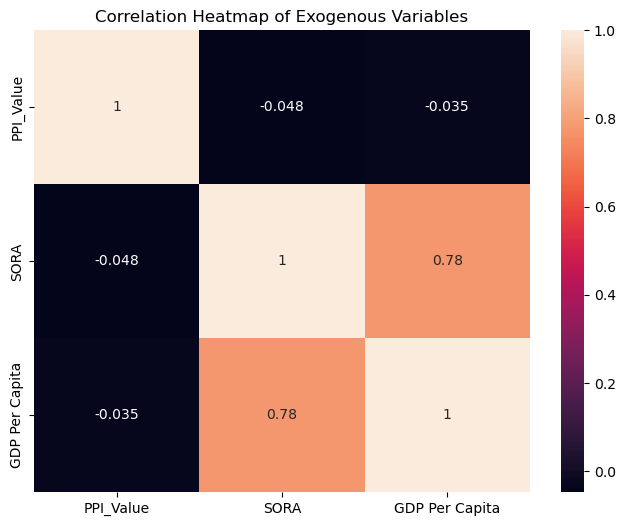

In [58]:

# Calculate pairwise correlations for exogenous variables in the training set
correlations = exog_train.corr()
print(correlations)

# Visualize correlations using a heatmap
plt.figure(figsize=(8, 6))  # Adjust the figure size to fit
sns.heatmap(correlations, annot=True)
plt.title("Correlation Heatmap of Exogenous Variables")
plt.show()

### SARIMAX Model

In [60]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=107.966, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=112.034, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=105.871, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=103.187, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=114.720, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=102.433, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=102.753, Time=0.04 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=102.032, Time=0.22 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=103.404, Time=0.40 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=103.162, Time=0.57 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=103.272, Time=0.23 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=102.356, Time=0.46 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=0.87 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=113.367, Time=0.05 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   

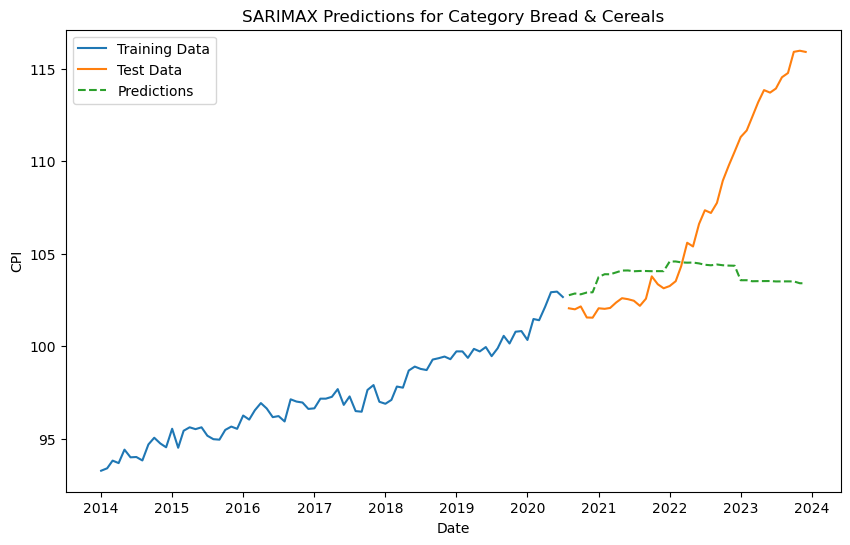

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 36.34883879962927
Root Mean Squared Error (MSE): 6.028999817517767
Mean Absolute Error (MAE): 4.362720679581779
R-squared (R²): -0.4399278044050685
Accuracy via RMSE(*1.96): 11.816839642334823%
Mean Absolute Percentage Error (MAPE): 3.9147611835508216%


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=160.150, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=163.398, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=163.041, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=161.561, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=162.105, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=162.109, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=164.150, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=161.640, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=161.433, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)

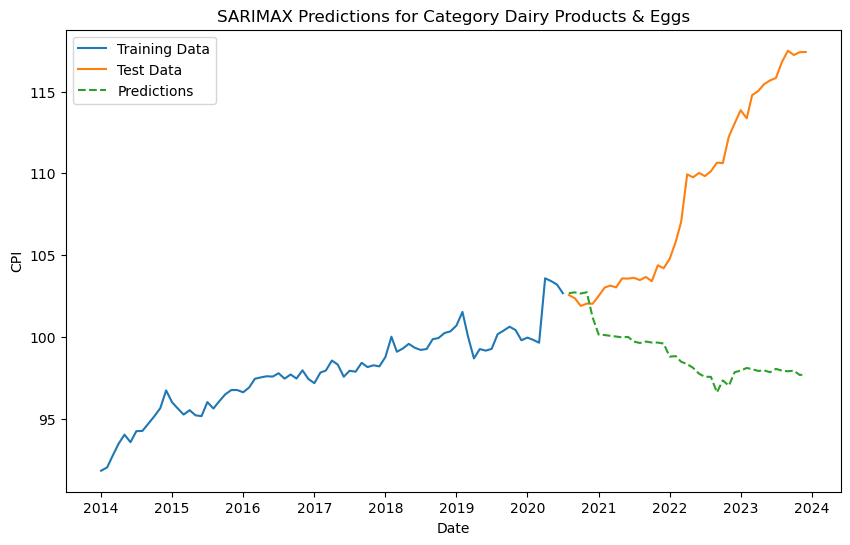

Mean Squared Error (MSE): 141.0603693952996
Root Mean Squared Error (MSE): 11.876883825115897
Mean Absolute Error (MAE): 9.786327277755975
R-squared (R²): -3.5967770756111737
Accuracy via RMSE(*1.96): 23.278692297227156%
Mean Absolute Percentage Error (MAPE): 8.714900328713664%


Performing stepwise search to minimize aic


C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=353.280, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=332.268, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=323.810, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=351.371, Time=0.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=345.941, Time=0.01 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=325.743, Time=0.25 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=316.369, Time=0.04 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=310.811, Time=0.21 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=337.974, Time=0.08 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=312.793, Time=0.39 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=312.787, Time=0.31 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=327.873, Time=0.20 sec
 ARIMA(1,1,2)(2,0,0)[1

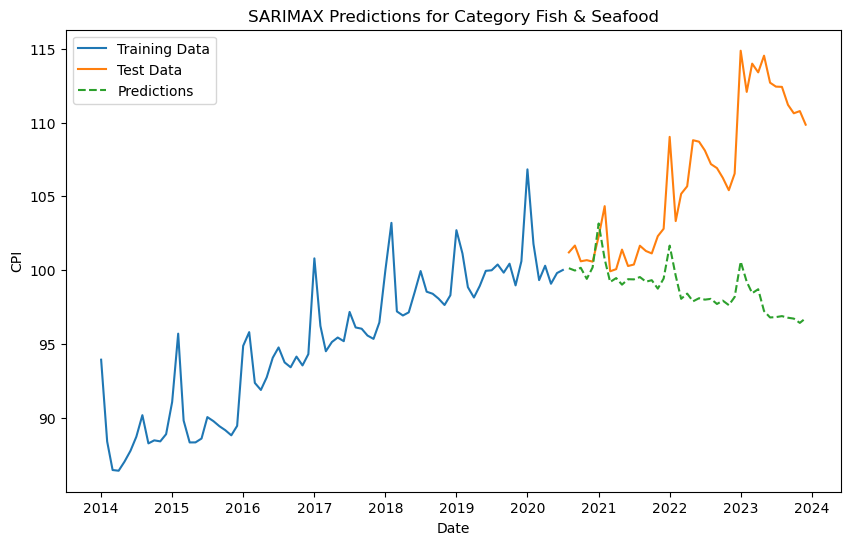

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 87.21733051741288
Root Mean Squared Error (MSE): 9.339021925095416
Mean Absolute Error (MAE): 7.441161858230645
R-squared (R²): -2.7668502076094357
Accuracy via RMSE(*1.96): 18.304482973187014%
Mean Absolute Percentage Error (MAPE): 6.789104200557221%


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=154.257, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=158.257, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=158.257, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=155.555, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=156.257, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=156.257, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=156.257, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=156.257, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[12] 

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


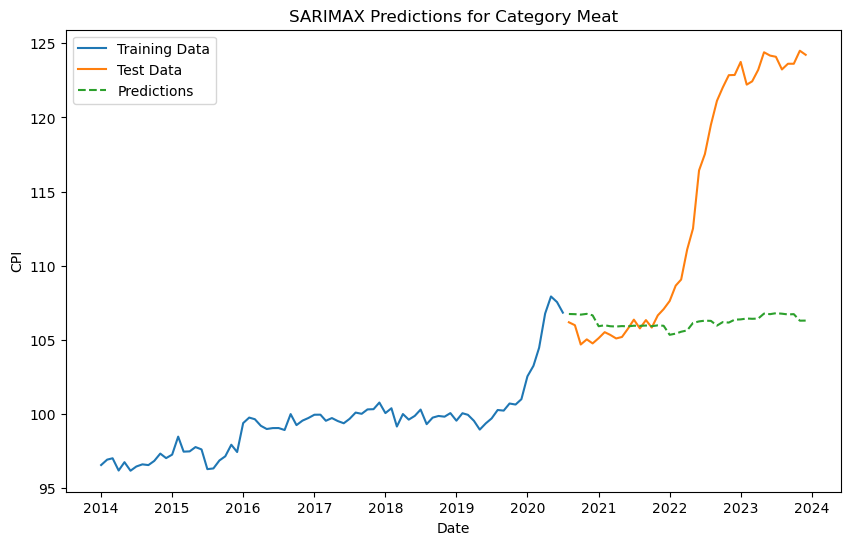

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 123.03677128357032
Root Mean Squared Error (MSE): 11.092194160019483
Mean Absolute Error (MAE): 8.233471157825505
R-squared (R²): -0.8531503767877939
Accuracy via RMSE(*1.96): 21.740700553638188%
Mean Absolute Percentage Error (MAPE): 6.801212612029431%


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=166.971, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=176.293, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=177.064, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=170.314, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=174.293, Time=0.00 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=165.546, Time=0.17 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=167.661, Time=0.05 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=166.825, Time=0.85 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=166.523, Time=0.19 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=168.836, Time=1.31 sec
 ARIMA(1,1,2)(0

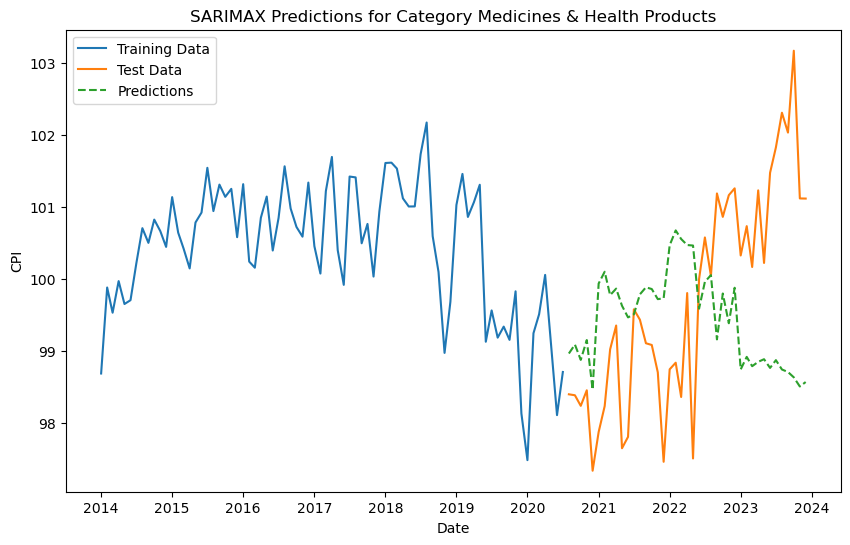

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 3.5558259263894767
Root Mean Squared Error (MSE): 1.8856897746950523
Mean Absolute Error (MAE): 1.5909119847539333
R-squared (R²): -0.6022715369664047
Accuracy via RMSE(*1.96): 3.6959519584023024%
Mean Absolute Percentage Error (MAPE): 1.589318415017144%


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=160.052, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=163.794, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=163.770, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=159.964, Time=0.00 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=161.887, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=161.871, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=161.962, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=161.956, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[1

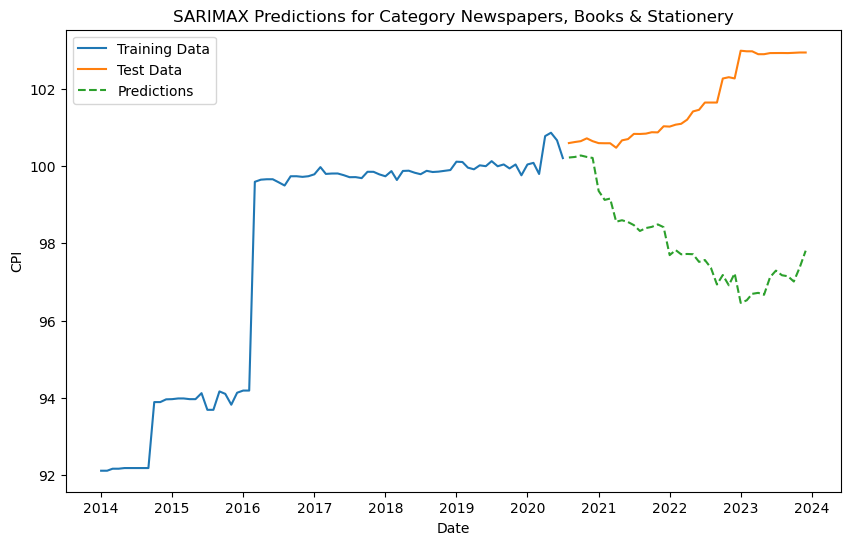

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 16.84276991303858
Root Mean Squared Error (MSE): 4.103994385112945
Mean Absolute Error (MAE): 3.605184247181107
R-squared (R²): -17.404838744422946
Accuracy via RMSE(*1.96): 8.043828994821373%
Mean Absolute Percentage Error (MAPE): 3.5310321201091677%


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=302.073, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=308.382, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=306.479, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=308.318, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=306.469, Time=0.00 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=303.664, Time=0.13 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=302.708, Time=0.17 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=303.631, Time=1.10 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=303.633, Time=1.21 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=303.792, Time=0.03 sec
 ARIMA(2,1,2)(0,0

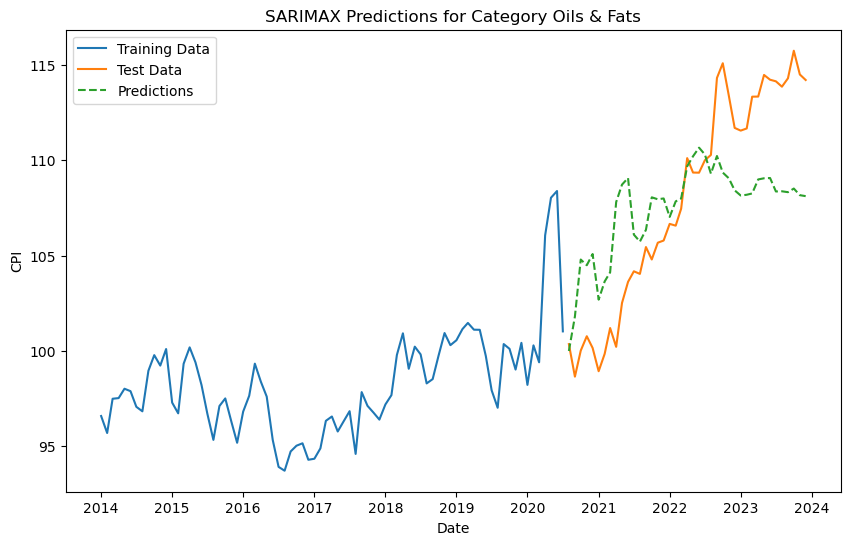

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 17.047545995004118
Root Mean Squared Error (MSE): 4.1288673985736235
Mean Absolute Error (MAE): 3.563240270849303
R-squared (R²): 0.44280909672768665
Accuracy via RMSE(*1.96): 8.092580101204302%
Mean Absolute Percentage Error (MAPE): 3.2867045438078035%


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=441.258, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=435.415, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=436.624, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=439.784, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=441.404, Time=0.01 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=437.138, Time=0.16 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=437.052, Time=0.05 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=436.534, Time=0.03 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=438.986, Time=0.34 sec
 ARIMA(0,1,0)(1,0,0

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


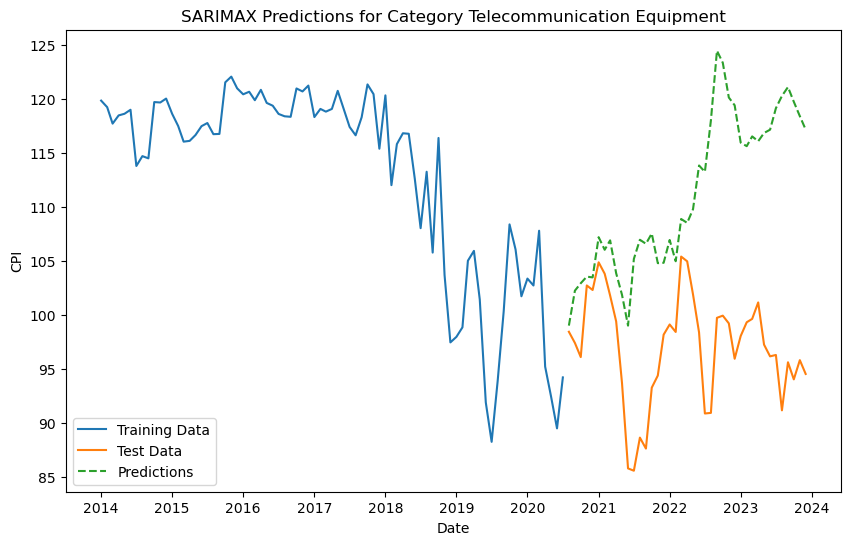

C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Squared Error (MSE): 273.4586024979141
Root Mean Squared Error (MSE): 16.536583761403506
Mean Absolute Error (MAE): 14.121023595996737
R-squared (R²): -10.29378744404186
Accuracy via RMSE(*1.96): 32.41170417235087%
Mean Absolute Percentage Error (MAPE): 14.83818034606047%


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=155.761, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=158.046, Time=0.04 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=157.864, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=159.972, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=156.571, Time=0.03 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=156.743, Time=0.03 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=157.482, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=157.232, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=156.824, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[

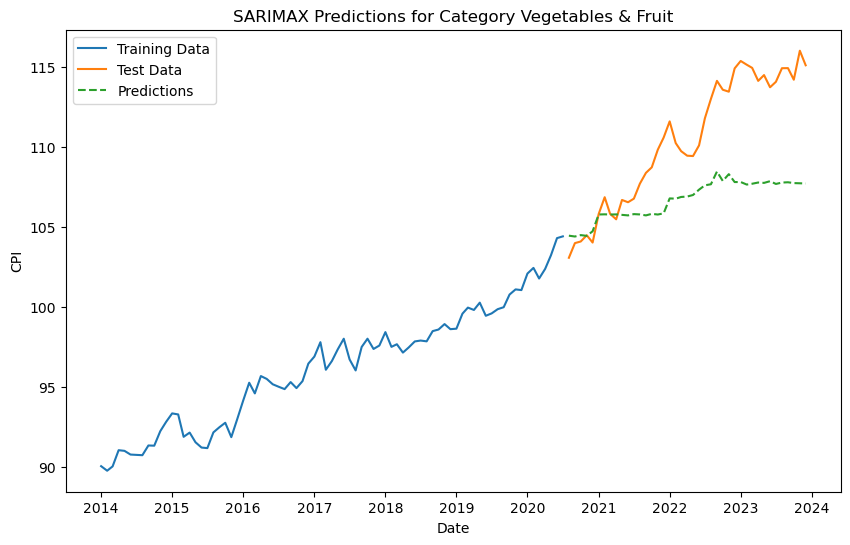

Mean Squared Error (MSE): 22.216171480029537
Root Mean Squared Error (MSE): 4.713403386092637
Mean Absolute Error (MAE): 3.8930241647519974
R-squared (R²): -0.41266717941463704
Accuracy via RMSE(*1.96): 9.23827063674157%
Mean Absolute Percentage Error (MAPE): 3.4455556518662327%




C:\Users\User\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from pmdarima.arima import auto_arima
# Assume 'merged_data' has columns: 'Date', 'Category', 'Target', 'Exog1', 'Exog2'
categories = merged_data['Category'].unique()
results = {}

for category in categories:
    # Filter data for the current category
    category_data = merged_data[merged_data['Category'] == category].sort_values('Date').reset_index()
    category_data.pop('index')
    
    # Split into train and test
    train = category_data[category_data['Date'] <= '2020-07-01']
    test = category_data[category_data['Date'] > '2020-07-01']
    
    y_train = train['CPI_Value']  # Target variable for training
    y_test = test['CPI_Value']    # Target variable for testing
    
    # Use meaningful exogenous variables
    exog_train = train[['PPI_Value','SORA','GDP Per Capita']]  # Use CPI and PPI as exogenous variables
    exog_test = test[['PPI_Value','SORA','GDP Per Capita']]    # Exogenous variables for testing

    # Perform Auto-ARIMA to find the best parameters
    auto_arima_model = auto_arima(
        y_train,
        exogenous=exog_train,
        seasonal=True,
        m=12,  # Yearly data
        stepwise=True,
        trace=True,  # Set to True for detailed output
        suppress_warnings=True,
        error_action='ignore'
    )

    # Extract the best parameters
    best_order = auto_arima_model.order
    best_seasonal_order = auto_arima_model.seasonal_order
    print(f"[Category {category}] Auto-ARIMA selected order: {best_order}, seasonal order: {best_seasonal_order}")

    # Fit the SARIMAX model for the specific category
    model = SARIMAX(
        y_train,
        exog=exog_train,
        order=best_order,
        seasonal_order=best_seasonal_order
    )
    sarimax_fit = model.fit(disp=False)

    # Predict only for the test period
    predictions = sarimax_fit.predict(
        start=test.index[0], 
        end=test.index[-1], 
        exog=exog_test  # Ensure this matches the test set length
    )
    
    # Save predictions and model results
    results[category] = {
        'model': sarimax_fit,
        'predictions': predictions,
        'actual': y_test
    }

    # Plot for the current category
    plt.figure(figsize=(10, 6))
    plt.plot(train['Date'], y_train, label='Training Data')
    plt.plot(test['Date'], y_test, label='Test Data')
    plt.plot(test['Date'], predictions, label='Predictions', linestyle='--')
    plt.title(f"SARIMAX Predictions for Category {category}")
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.legend()
    plt.show()

    # Printing error values
    mse = mean_squared_error(y_test, predictions)
    rmse = mean_squared_error(y_test, predictions,squared = False)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (MSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared (R²): {r2}")
    print(f"Accuracy via RMSE(*1.96): {rmse*1.96}%")
    print(f"Mean Absolute Percentage Error (MAPE): {mape*100}%")
    print("\n")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f51290d-cef9-4512-ae50-60c251b40e59' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>